In [1]:
import pandas as pd
import hdbscan
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
filepath = "/Users/berkeleyho/Documents/College 22-26 Info/Spring '25/Glazer - SDS 375/Project/data/players/pitching_avg.csv"
df = pd.read_csv(filepath)

In [ ]:
# Filter only pre-trade players
pre_trade_df = df[df["trade_status"] == "pre_trade"].copy()



# Select relevant numerical features (excluding categorical columns)
features = [
    "avg_IP", "gs_pct", "sv_pct", "hld_pct", "tbf_avg", "h_avg", "er_avg", "bb_avg", 
    "hbp_avg", "wp_avg", "bk_avg", "k_per9_avg", "bb_per9_avg", "so_avg", "whip_avg", 
    "babip_avg", "fip_avg", "pitches_avg"
]

X = pre_trade_df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=2, metric='euclidean')
pre_trade_df["cluster"] = clusterer.fit_predict(X_scaled)

# Display results
print(pre_trade_df[["player_name", "cluster"]])

          player_name  cluster
31    Anderson, Tyler        0
32   Armstrong, Shawn        1
33    Castillo, Diego        1
34        Cessa, Luis        1
35      Curtiss, John        1
..                ...      ...
223    Weathers, Ryan        0
224     Wolf, Jackson       -1
225   Yarbrough, Ryan       -1
229   Howard, Spencer       -1
230       Maton, Phil        1

[118 rows x 2 columns]


/Users/berkeleyho/Library/Python/3.10/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/berkeleyho/Library/Python/3.10/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
pip install umap-learn==0.5.2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


/Users/berkeleyho/Library/Python/3.10/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


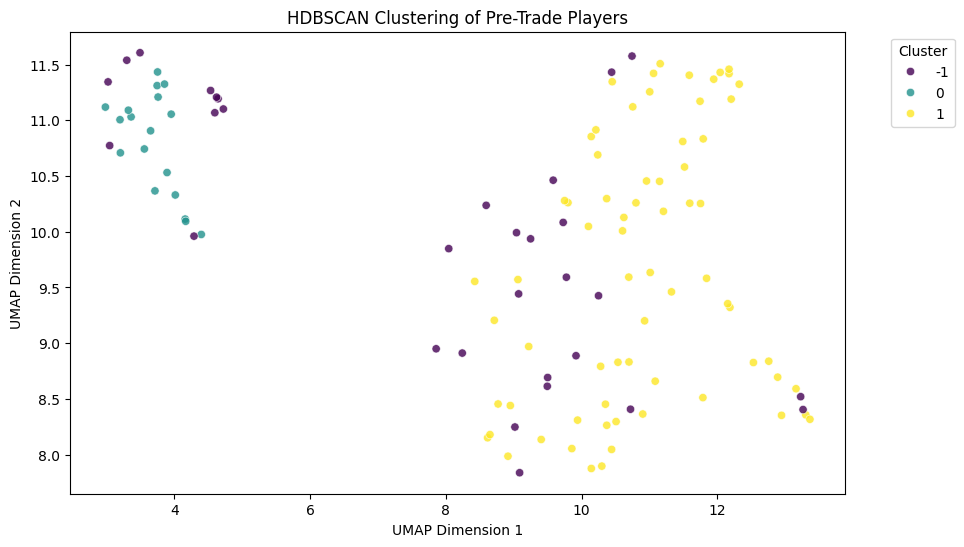

In [5]:
import umap
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce dimensions for visualization
reducer = umap.UMAP(n_neighbors=10, min_dist=0.1, metric='euclidean', random_state=42)
embedding = reducer.fit_transform(X_scaled)

# Convert to DataFrame
pre_trade_df["UMAP_1"] = embedding[:, 0]
pre_trade_df["UMAP_2"] = embedding[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="UMAP_1", y="UMAP_2", hue="cluster", palette="viridis", data=pre_trade_df, alpha=0.8
)
plt.title("HDBSCAN Clustering of Pre-Trade Players")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()
